# Specifying the rise time of a subfault

Up to Version 5.4.0, the function `dtopotools.rise_fraction` took input arguments `rise_time` and `rise_time_ending` for which the total rise time was assumed to be `rise_time + rise_time_ending`, with idea that `rise_time` might actually be `rise_time_starting` as defined in some subfault format files, e.g. <http://www.geol.ucsb.edu/faculty/ji/big_earthquakes/2011/03/0311/result_c/static_out>.

This is potentially confusing and so it has been rewritten so that `rise_time` is now the total rise time and if the optional parameter `rise_time_ending` is specified then `rise_time_starting = rise_time - rise_time_ending` (and if it is not specified then `rise_time_starting = rise_time_ending = rise_time/2.` is set internally.

Another new argument `shape` has been introduced to allow either piecewise linear or quadratic rise times.

## The new signature and docstring:


```
def rise_fraction(t, rupture_time, rise_time, rise_time_ending=None, 
                  shape='quadratic'):
    """
    A continuous piecewise quadratic or linear function of t that is 

     *  0 for t <= rupture_time, 
     *  1 for t >= rupture_time + rise_time 

    :Inputs:
    
    - *t* (scalar, list, or np.array): times at which to evaluate the 
      rise function.
    - *rupture_time* (float): time (seconds) when rupture starts.
    - *rise_time* (float): duration of rupture (seconds).
    - *rise_time_ending* (float or None): If None, it is internally set to 
      `rise_time/2`. 
    - *shape* (str): 
      If `shape == "quadratic"`, the rise time function is piecewise quadratic,
      continuously differentiable, with maximum slope at 
      `t = rupture_time + rise_time - rise_time_ending`
      and zero slope at `t = rupture_time` and `t = rupture_time + rise_time`.
      If `shape == "linear"`, the rise time function is piecewise linear,
      with value 0.5 at 
      `t = rupture_time + rise_time - rise_time_ending`.
    
    :Outputs:
    
    *rf* (float or np.array): The rise time function evaluated at `t`.
    If the input is a list or tuple of times, returns a numpy array.
   """
  ```  

## Examples:

In [1]:
%matplotlib inline

In [2]:
from clawpack.geoclaw import dtopotools
import numpy as np
import matplotlib.pyplot as plt

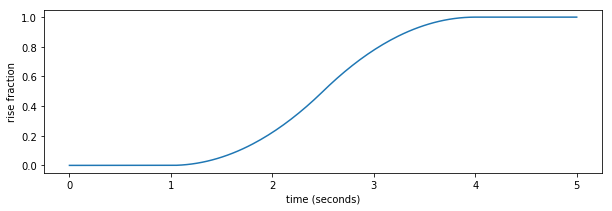

In [3]:
# quadratic with only rise_time specified:
t0 = 1.   # rupture time
rise_time = 3.

t_array = np.linspace(0.,5.,200)
rf_array = dtopotools.rise_fraction(t_array, t0, rise_time)

plt.figure(figsize=(10,3))
plt.plot(t_array,rf_array);
plt.ylabel('rise fraction');
plt.xlabel('time (seconds)');

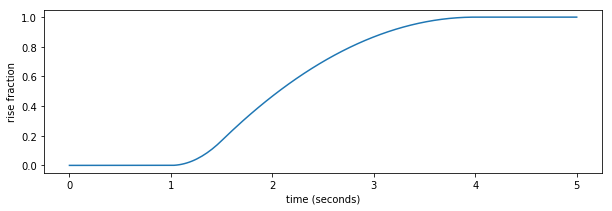

In [4]:
# quadratic with rise_time_ending also specified:
t0 = 1.    # rupture time
rise_time = 3.
rise_time_ending = 2.5

t_array = np.linspace(0.,5.,200)
rf_array = dtopotools.rise_fraction(t_array, t0, rise_time, rise_time_ending)

plt.figure(figsize=(10,3))
plt.plot(t_array,rf_array);
plt.ylabel('rise fraction');
plt.xlabel('time (seconds)');

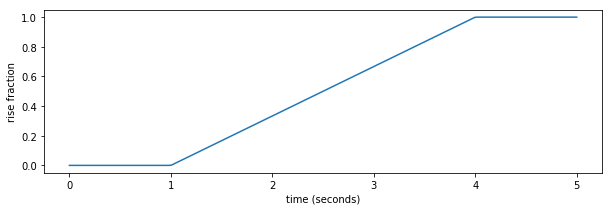

In [5]:
# linear with rise_time only specified
t0 = 1.    # rupture time
rise_time = 3.

t_array = np.linspace(0.,5.,200)
rf_array = dtopotools.rise_fraction(t_array, t0, rise_time, shape='linear')

plt.figure(figsize=(10,3))
plt.plot(t_array,rf_array);
plt.ylabel('rise fraction');
plt.xlabel('time (seconds)');

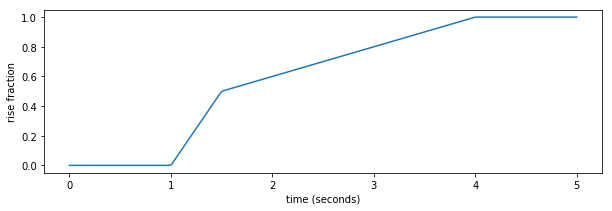

In [6]:
# linear with rise_time_ending also specified
t0 = 1.    # rupture time
rise_time = 3.
rise_time_ending = 2.5

t_array = np.linspace(0.,5.,200)
rf_array = dtopotools.rise_fraction(t_array, t0, rise_time, rise_time_ending, shape='linear')

plt.figure(figsize=(10,3))
plt.plot(t_array,rf_array);
plt.ylabel('rise fraction');
plt.xlabel('time (seconds)');